## EDA

#### Description of dataset variables
- Pregnancies. Number of pregnancies of the patient (numeric)
- Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
- SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)
- Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
- BMI. Body mass index (numeric)
- DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
- Age. Age of patient (numeric)
- Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

The target is to predict whether or not the patient has diabetes.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Scanning and surface data cleaning

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df.shape

(768, 9)

Consists of 9 variables and 768 entries

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All data are numerical, integer and decimal

In [38]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null data in the dataset.

In [39]:
df.duplicated().sum()

0

No duplicate entries

### 2) Univariate analysis

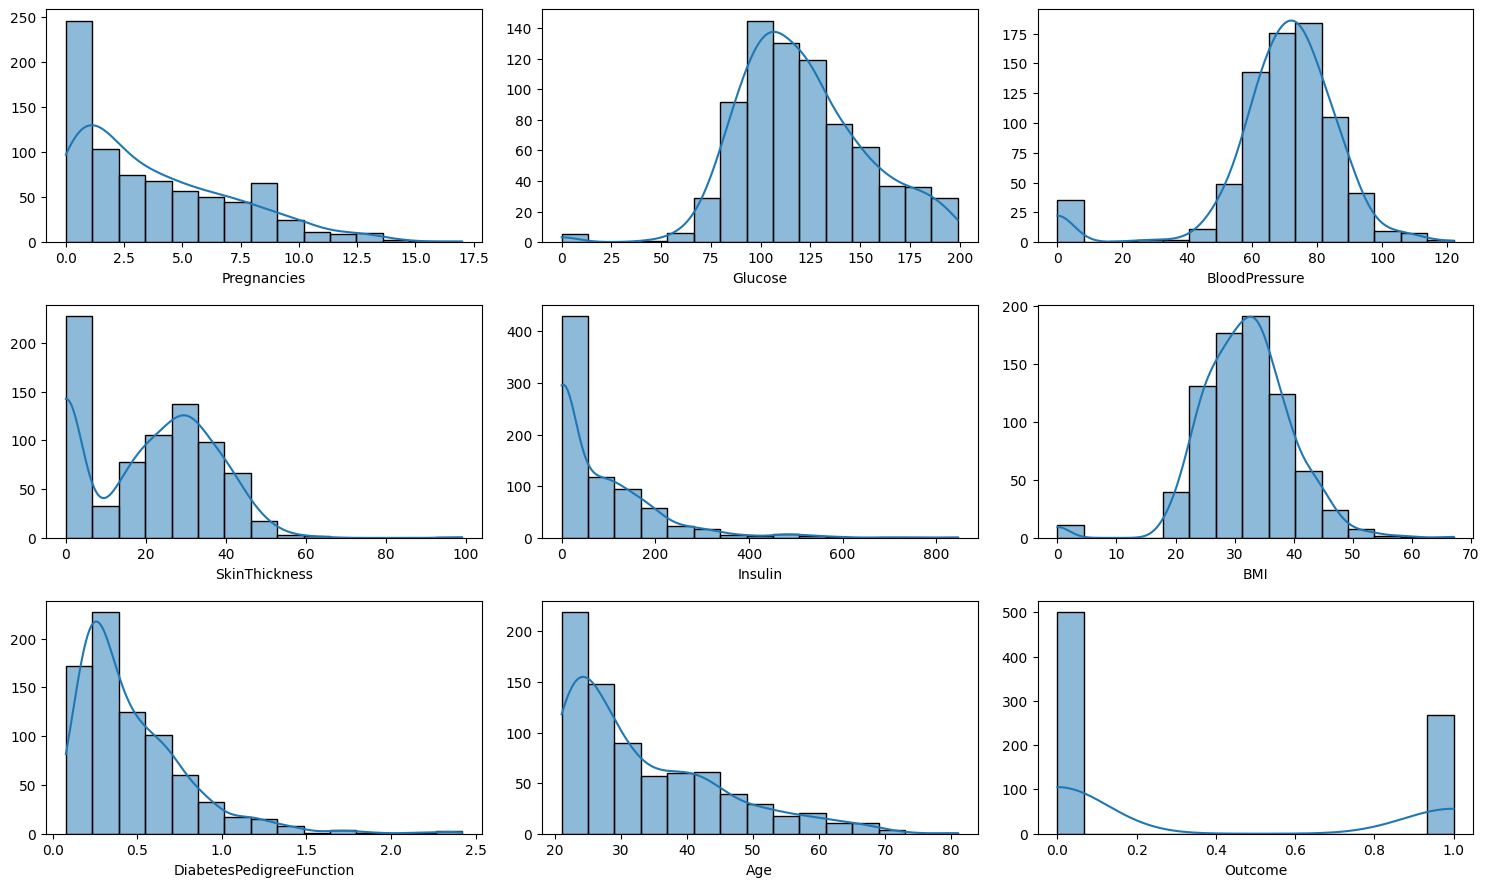

<Figure size 640x480 with 0 Axes>

In [40]:
# Obtain the numerical columns
column_num = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns required for the subcharts
num_rows = (len(column_num) + 2) // 3
num_columns = 3

# Create subcharts
fig, axis = plt.subplots(num_rows, num_columns, figsize=(15, 3 * num_rows))

# Generate histograms for each numerical variable
for i, columna in enumerate(column_num):
    sns.histplot(ax=axis[i // num_columns, i % num_columns], data=df, x=columna, bins=15, kde=True).set(ylabel=None)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()



In [41]:

# Selects only columns of type int or float
column_num = df.select_dtypes(include=['int64', 'float64']).columns

# Dictionary for storing the number of zero values per column
number_zeros = {}

# Iterates over all columns of the numeric DataFrame
for column in column_num:
   # Counts the number of zero values in the column
    sum_zeros = (df[column] == 0).sum()
    
    # If there is at least one zero value, add the column and quantity to the dictionary.
    if sum_zeros > 0:
        number_zeros[column] = sum_zeros

for column, sum_zeros in number_zeros.items():
    print(f"{column}: {sum_zeros}")


Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
Outcome: 500


We have zero values in some variables, data that were probably obtained erroneously and that in this case we are not going to eliminate as it would negatively alter our final model. Taking into account that it is a small dataset and that the values we could eliminate are too many, compared to the amount of entries in it.
We highlight the amount of zero values in SkinThickness: 227 and Insulin: 374, taking into account that a person cannot have a zero insulin value or skin thickness.
We also have the body mass index with 11 entries with zero value and the blood pressure with 35.


### 3) Multivariate analysis

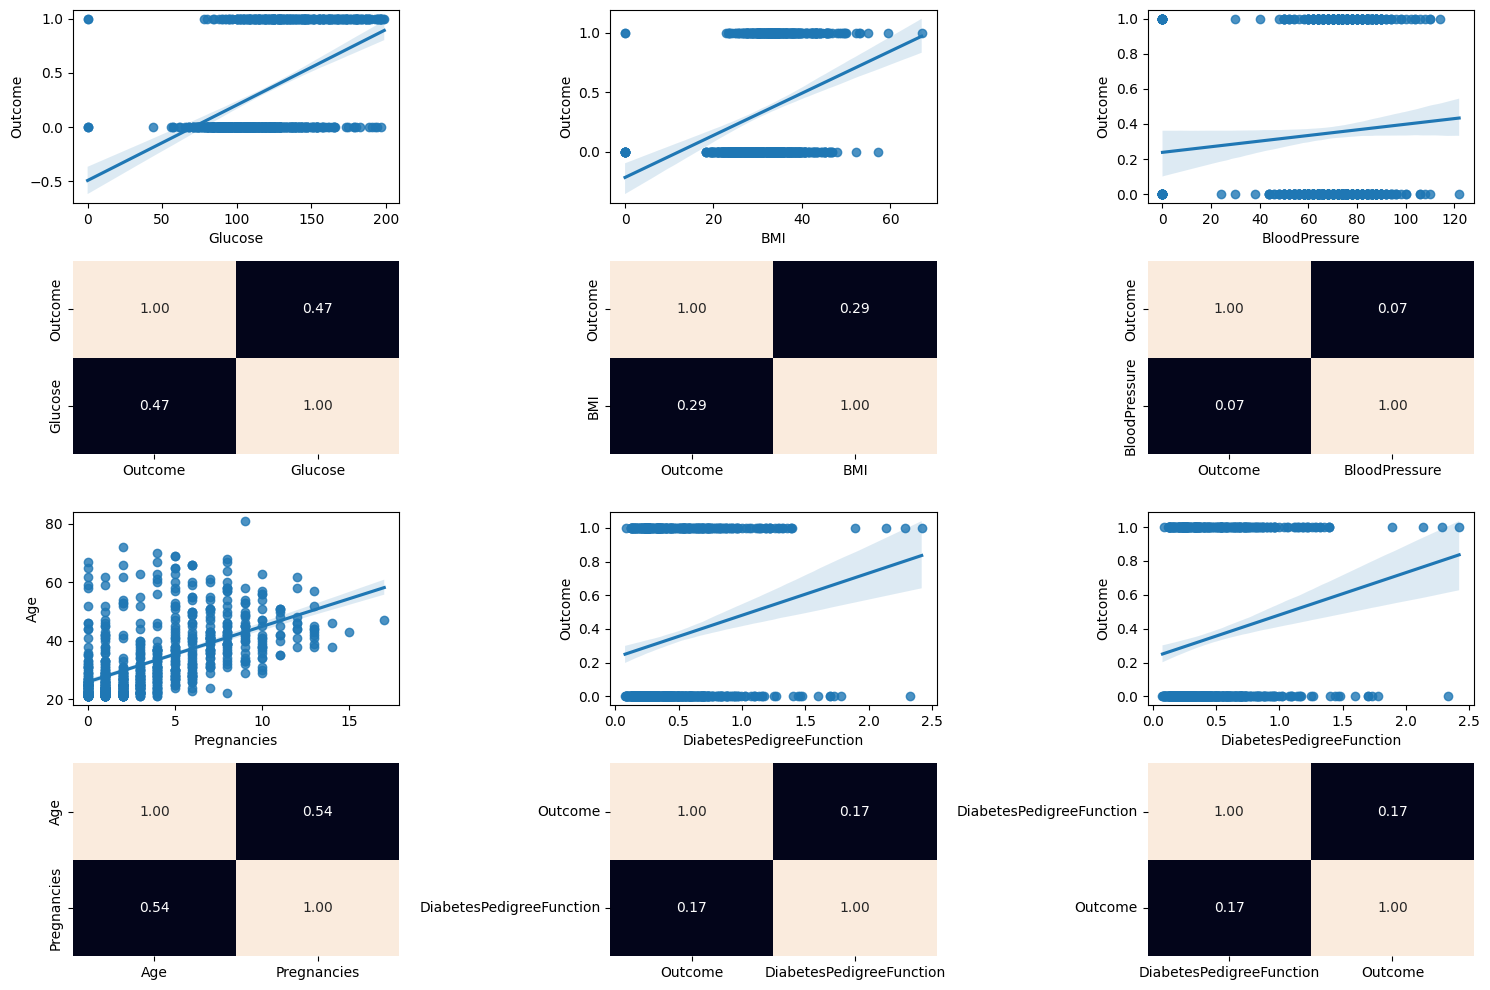

In [42]:
# Analysis N-N
fig, axis = plt.subplots(4, 3, figsize = (15, 10))


sns.regplot(ax = axis[0,0], data = df, x = "Glucose", y = "Outcome")
sns.heatmap(df[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

sns.regplot(ax = axis[0,1], data = df, x = "BMI", y = "Outcome")
sns.heatmap(df[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0,2], data = df, x = "BloodPressure", y = "Outcome")
sns.heatmap(df[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[2, 0], data = df, x = "Pregnancies", y = "Age")
sns.heatmap(df[["Age", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(df[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[2, 2], data = df, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(df[["DiabetesPedigreeFunction", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2], cbar = False)

plt.tight_layout()
plt.show()

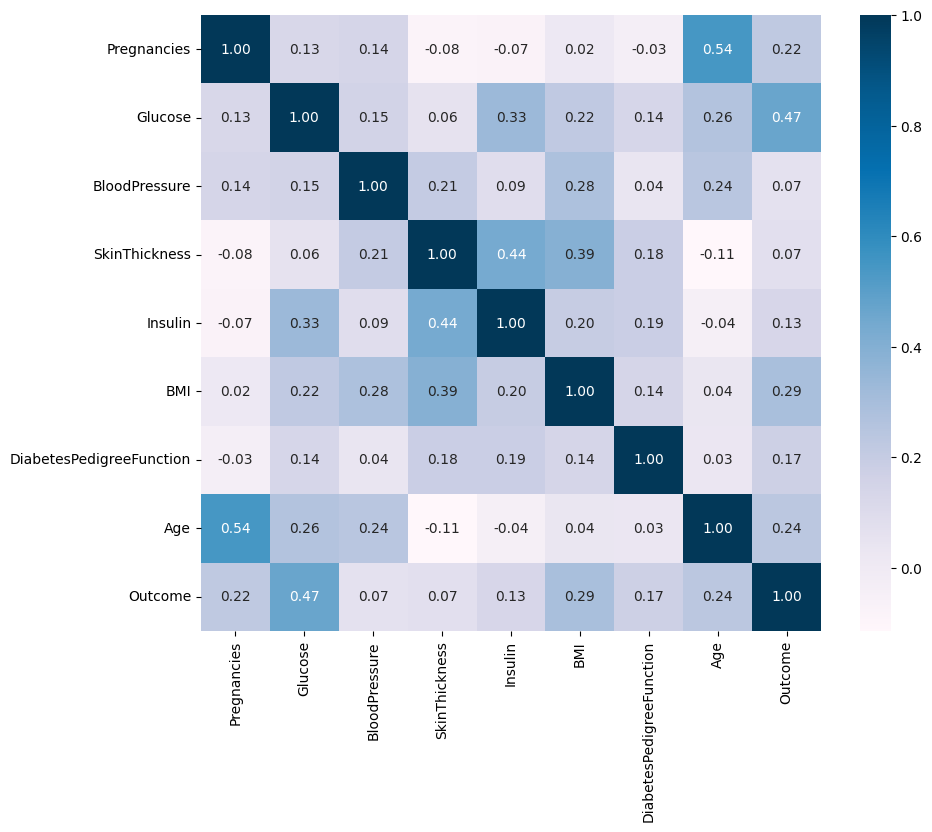

In [43]:
# Correlation map

column_num = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap((df[column_num].corr()), annot=True, cmap='PuBu', fmt=".2f")
plt.show()



We found moderate positive relationships:
* SkinThickness and Insulin
* SkinThickness and BMI
* Glucose and insulin
* Age and Pregnancies

No moderate or strong negative relationships, only weak and rare.

### 3) Outlier analysis

In [44]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


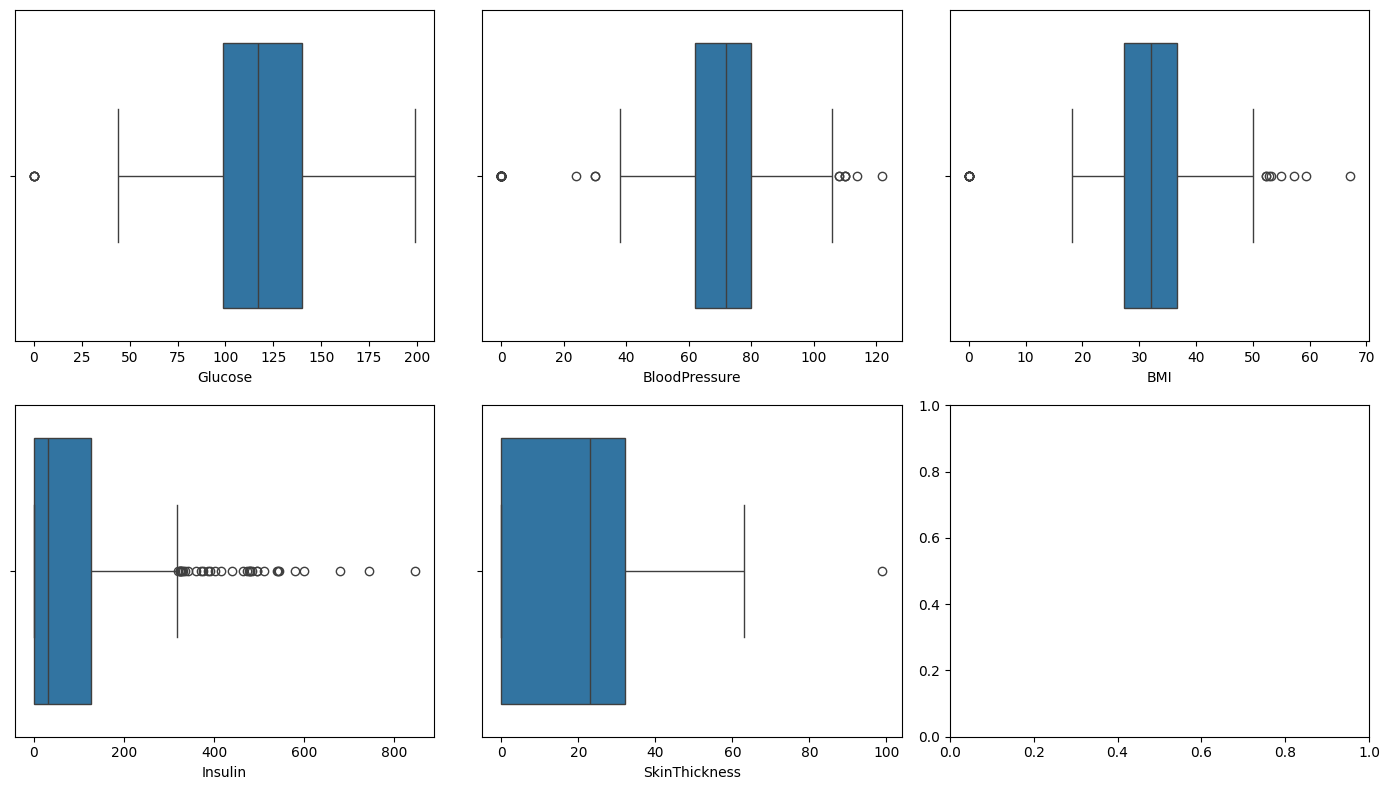

In [45]:
# Display outliers
fig, axis = plt.subplots(2, 3, figsize = (14, 8))

sns.boxplot(ax = axis[0, 0], data = df, x = "Glucose")
sns.boxplot(ax = axis[0, 1], data = df, x = "BloodPressure")
sns.boxplot(ax = axis[0, 2], data = df, x = "BMI")
sns.boxplot(ax = axis[1, 0], data = df, x = "Insulin")
sns.boxplot(ax = axis[1, 1], data = df, x = "SkinThickness")


plt.tight_layout()
plt.show()


In [ ]:
# df = df.dropna()
# df = df[(df['Insulin'] < 450) & (df['Glucose'] > 40) & (df['BloodPressure'] > 35) & (df['SkinThickness'] < 75) & (df['BMI'] < 40) & (df['BMI']> 20)]

Filter and Delete Rows with Conditions. The accuracy of the model has not been what I wanted, I rule it out

In [46]:
# Adjust outliers
columns_with_outliers = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" ]

for column in columns_with_outliers:
    mean_without_zeros = df[df[column] != 0][column].mean()

    df[column] = df[column].replace(0, mean_without_zeros)


The strategy used is to replace the zero values in these columns with the average of the non-zero values in that same column.
This outlier setting is what provides the highest model accuracy.

### 4) Split into Train and Test

In [49]:
# For classification
from sklearn.model_selection import train_test_split

X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71)

X_train.shape

(614, 8)

In the decision tree, no scaling of variables is done. Predictor variables do not need to be normalised, as decision trees are not affected by the scale of the data.

In [50]:
# Save 
X_train.to_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/X_train.csv", index=False) # PREDICTORS OF TRAIN
y_train.to_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/y_train.csv", index=False)

X_test.to_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/X_test.csv", index=False)# # PREDICTORS OF TEST
y_test.to_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/y_test.csv", index=False)
df.to_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/raw/diabete.csv")